In [1]:
from IPython.display import IFrame
IFrame("task.pdf", width=900, height=800)

# Теоретические вопросы

## 1.1 Примеры

In [10]:
%%latex

a) Рассмотрим семейство $h_a : \mathbb{Z} \rightarrow \mathbb{Z}_m$, 
где $a \in \mathbb{Z}_m$ и $h_a(x) = (x + a) \; mod \; m$. Очевидно, такое семейство равномерно распределено, т.к.
для фиксированного ключа при равновероятном выборе параметра значение хэш функции распределно равномерно. С другой 
стороны понятно, что, например, для ключей $x$ и $x+1$ значения хэш функции на них не являются независимыми.

<IPython.core.display.Latex object>

## 1.2 Последовательности ДНК

Такая хэш функция очень неравномерно распределена: чем больше значение, тем больше днк, имеющих такой хэш. В дополнение к этому, 'похожие' днк достаточно часто будут иметь близкие или одинаковые значения хэш-функции, что на практике очень плохо.

# 2 Хэш-таблицы

## 2.1 Реализации

Реализации интрефейса `IHashSet` находятся в папке `inc/hashset`. Реализации хэш-функций находятся в папке `inc/hash`(для компиляции необходима `openssl`).

Реализованные хэш-таблицы:
- Хэширование цепочками
- Линейное пробирование
- Квадратичное пробирование
- Двойное хэширование
- Кукушка

Имеющиеся хэш-функции:
- md5
- sha256
- murmur3

(`std::hash` далее не рассматривается т.к. в `gcc` он реализован как `murmur`).

## 2.2 Бенчмарки

Из-за малого количества слов размер выборки ограничен `10^6`. Измерения проводятся на строках - [370 тысячах английских слов](https://github.com/dwyl/english-words), повторённых несколько раз для набора необходимо количества. Само тестирование описано в `hash-lab.cpp`. Его результаты могут быть найдены в формате `csv` в папке `data`.

In [3]:
from math import log, sqrt

def visualize(data, name):
    data["log"] = data["size"].map(log) * 1000 # some scaling
    data["sqrt"] = data["size"].map(sqrt) * 100 # to fit
    
    plt = data.plot(x="size", y=["mean_time", "log", "sqrt"])
    plt.set_ylabel("nanoseconds")
    plt.set_xscale("log")
    plt.set_title(name)

In [4]:
import pandas as pd
from glob import glob
from pathlib import Path

def process(table):
    for fname in glob(f"data/{table}*.csv"):
        data = pd.read_csv(fname, sep='\t')
        name = Path(fname).stem
        visualize(data, name)

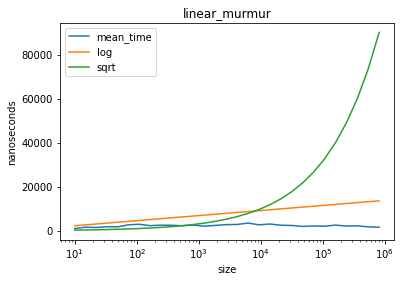

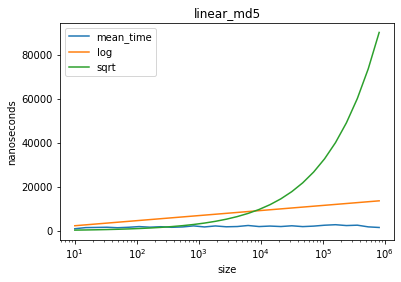

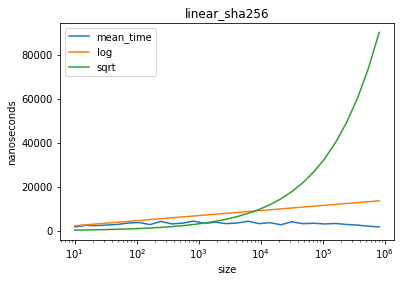

In [5]:
process("linear")

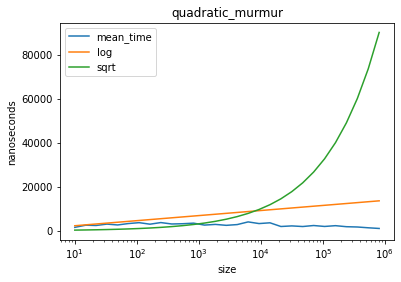

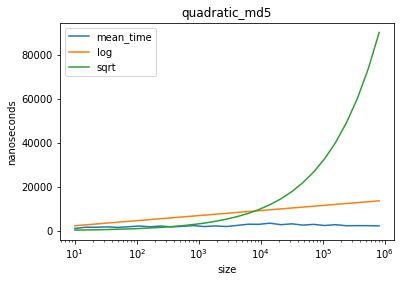

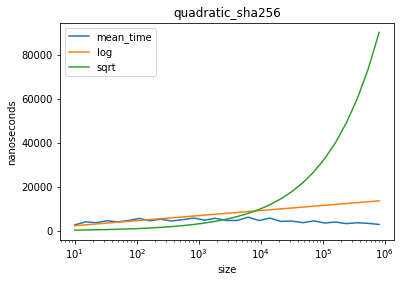

In [6]:
process("quadratic")

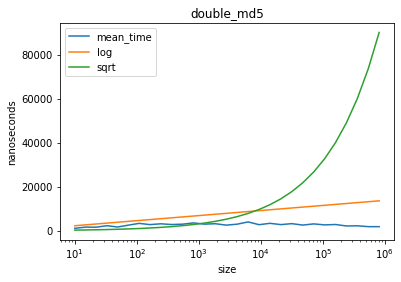

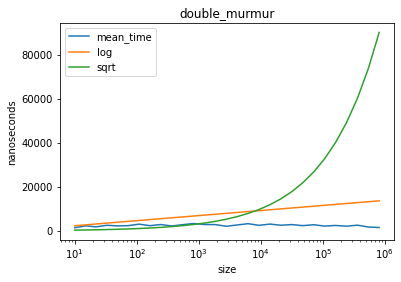

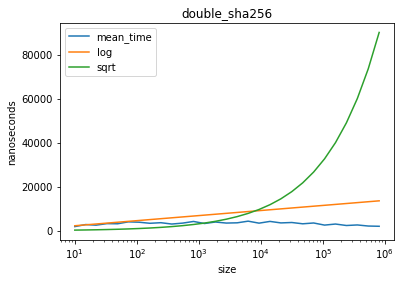

In [7]:
process("double")

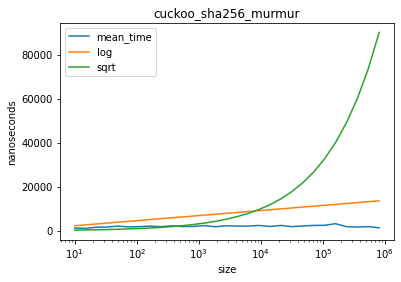

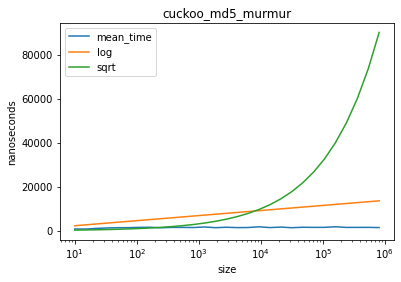

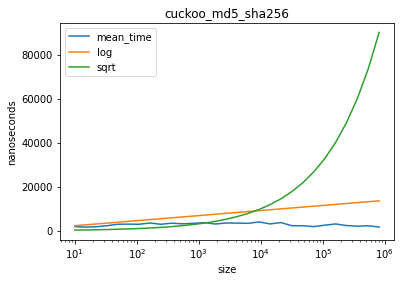

In [8]:
process("cuckoo")

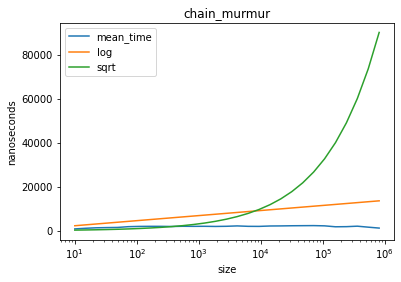

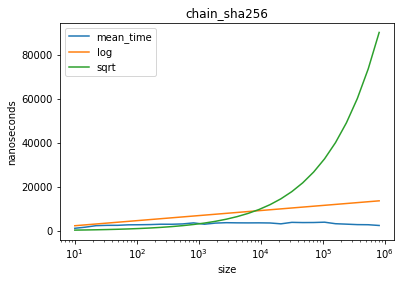

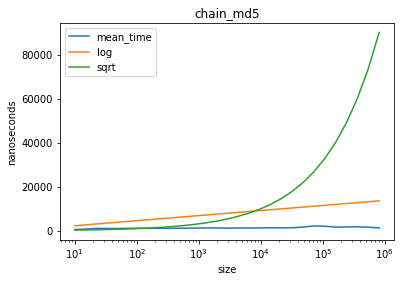

In [9]:
process("chain")

Из графиков видно, что среднее амортизированное время работы действительно константа.